# myConvexHull

## Library myConvexHull

### Import Library Eksternal

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

### Fungsi Antara dan Variabel Konstan

In [2]:
# EPSILON digunakan untuk menghandle kasus rounding error
EPSILON = 0.00001

In [3]:
# function checkPosistion (p1, p2, p3 : point) -> real
# Mengembalikan suatu angka untuk mengetahui di sebelah mana p3
# menurut garis yang dibentuk p1 dan p2 menggunakan determinan
def checkPosition(p1, p2, p3):
    mat = np.array([
        np.append(p1, 1),
        np.append(p2, 1),
        np.append(p3, 1),
    ])
    return np.linalg.det(mat)

In [4]:
# function getAngle (p1, p2, p3 : point) -> real
# Mengembalikan sudut yang dibentuk oleh p1p2p3
def getAngle(p1, p2, p3):
    ba = p1 - p3
    bc = p2 - p3

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

In [5]:
# function getMaxDistancePoint (points : array of point, p1, p2 : point) -> point
# Mengembalikan point dengan jarak terjauh dari garis p1p2
# Jika terdapat jarak yang sama, akan dibandingkan dari besar sudut
def getMaxDistancePoint(points, p1, p2):
    maxPoint = points[0]
    maxDis = np.linalg.norm(np.cross(p2-p1, p1-points[0]))/np.linalg.norm(p2-p1)
    for point in points:
        dis = np.linalg.norm(np.cross(p2-p1, p1-point))/np.linalg.norm(p2-p1)
        if (dis > maxDis):
            maxDis = dis
            maxPoint = point
        elif (dis == maxDis):
            if (getAngle(point, p2, p1) > getAngle(maxPoint, p2, p1)):
                maxDis = dis
                maxPoint = point
    return maxPoint

In [6]:
# function merge (simplices1, simplices2 : simplices) -> simplices
# Mengembalikan hasil gabungan dari simplices1 dan simplices2
def merge(simplices1, simplices2):
    if (simplices1.size == 0):
        return simplices1
    else:
        return np.vstack([simplices1, simplices2])

### Fungsi Utama

In [7]:
# function convexHull (points : array of point) -> simplices
# Mengembalikan simplices dari points
# Menggunakan Algoritma Divide and Conquer
def convexHull(points):
    # sort
    points.view('i8,i8').sort(order=['f0','f1'], axis=0)
    
    # get p1 and p2
    p1 = points[0]
    p2 = points[-1]
    
    # partiton
    S1 = np.array([np.array([0,0])]) # Set of points right to the line p1p2
    S2 = np.array([np.array([0,0])]) # Set of points right to the line p2p1
    
    for point in points:
        if (checkPosition(p1, p2, point) > EPSILON):
            S1 = np.vstack([S1, point])
        if (checkPosition(p2, p1, point) > EPSILON):
            S2 = np.vstack([S2, point])
    
    S1 = np.delete(S1, 0, 0)
    S2 = np.delete(S2, 0, 0)
    
    simplices = merge(findHull(S1, p1, p2), findHull(S2, p2, p1))
    
    return simplices

In [8]:
# function findHull (points : array of point, p1, p2 : point) -> simplices
# Mengembalikan simplices dari points
# Menggunakan fungsi rekursif
def findHull(points, p1, p2):
    if (points.size == 0):
        return np.array([np.array([p1, p2])])
    else:
        pMax = getMaxDistancePoint(points, p1, p2)
        
        S1 = np.array([np.array([0,0])]) # Set of points right to the line p1pMax
        S2 = np.array([np.array([0,0])]) # Set of points right to the line pMaxp2
    
        for point in points:
            if (checkPosition(p1, pMax, point) > EPSILON):
                S1 = np.vstack([S1, point])
            if (checkPosition(pMax, p2, point) > EPSILON):
                S2 = np.vstack([S2, point])
    
        S1 = np.delete(S1, 0, 0)
        S2 = np.delete(S2, 0, 0)
        
        simplices = merge(findHull(S1, p1, pMax), findHull(S2, pMax, p2))
        
        return simplices

## Test Cases

### Data iris

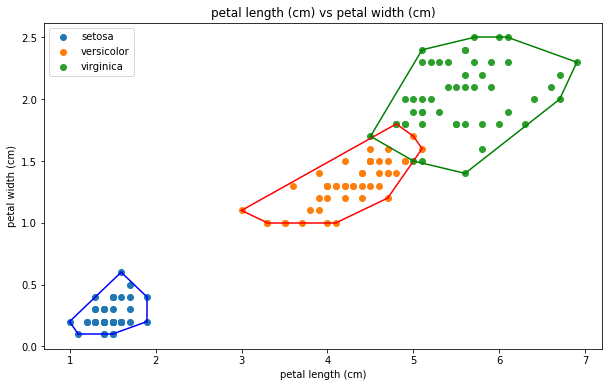

In [9]:
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
#visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title(str(data.feature_names[2] + ' vs ' + data.feature_names[3]))
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = convexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        x_values = [simplex[0][0], simplex[1][0]]
        y_values = [simplex[0][1], simplex[1][1]]
        plt.plot(x_values, y_values, colors[i])
plt.legend()

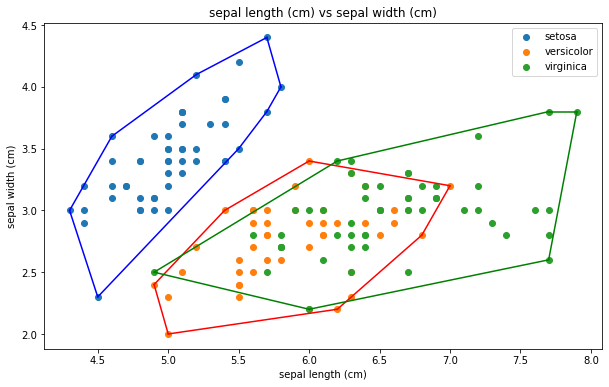

In [10]:
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
#visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title(str(data.feature_names[0] + ' vs ' + data.feature_names[1]))
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = convexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        x_values = [simplex[0][0], simplex[1][0]]
        y_values = [simplex[0][1], simplex[1][1]]
        plt.plot(x_values, y_values, colors[i])
plt.legend()

### Data breast_cancer (bonus)

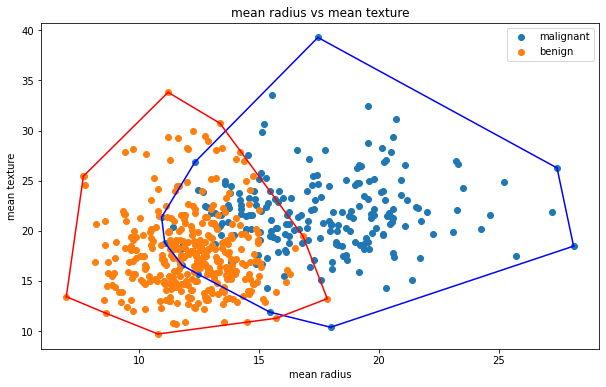

In [11]:
data = datasets.load_breast_cancer()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
#visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r']
plt.title(str(data.feature_names[0] + ' vs ' + data.feature_names[1]))
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = convexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        x_values = [simplex[0][0], simplex[1][0]]
        y_values = [simplex[0][1], simplex[1][1]]
        plt.plot(x_values, y_values, colors[i])
plt.legend()

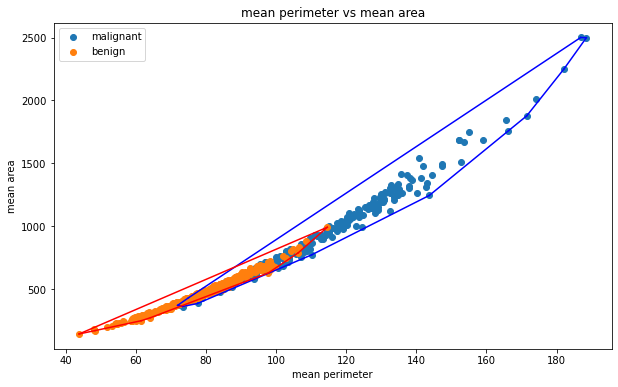

In [12]:
data = datasets.load_breast_cancer()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
#visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r']
plt.title(str(data.feature_names[2] + ' vs ' + data.feature_names[3]))
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = convexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        x_values = [simplex[0][0], simplex[1][0]]
        y_values = [simplex[0][1], simplex[1][1]]
        plt.plot(x_values, y_values, colors[i])
plt.legend()

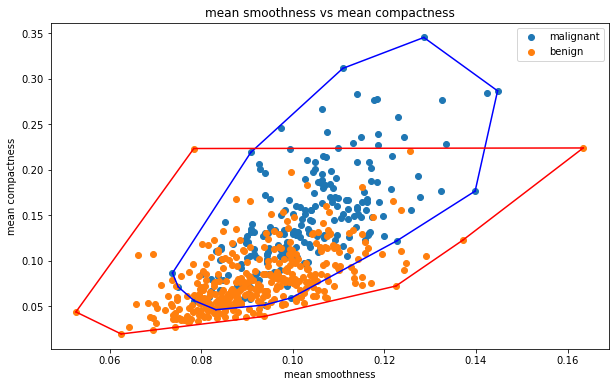

In [13]:
data = datasets.load_breast_cancer()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
#visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r']
plt.title(str(data.feature_names[4] + ' vs ' + data.feature_names[5]))
plt.xlabel(data.feature_names[4])
plt.ylabel(data.feature_names[5])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[4,5]].values
    hull = convexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        x_values = [simplex[0][0], simplex[1][0]]
        y_values = [simplex[0][1], simplex[1][1]]
        plt.plot(x_values, y_values, colors[i])
plt.legend()

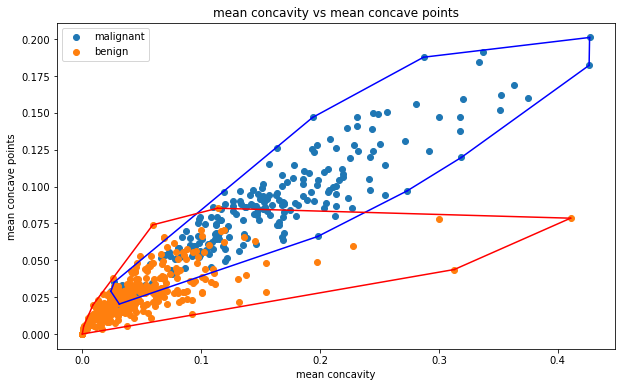

In [14]:
data = datasets.load_breast_cancer()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
#visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r']
plt.title(str(data.feature_names[6] + ' vs ' + data.feature_names[7]))
plt.xlabel(data.feature_names[6])
plt.ylabel(data.feature_names[7])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[6,7]].values
    hull = convexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        x_values = [simplex[0][0], simplex[1][0]]
        y_values = [simplex[0][1], simplex[1][1]]
        plt.plot(x_values, y_values, colors[i])
plt.legend()

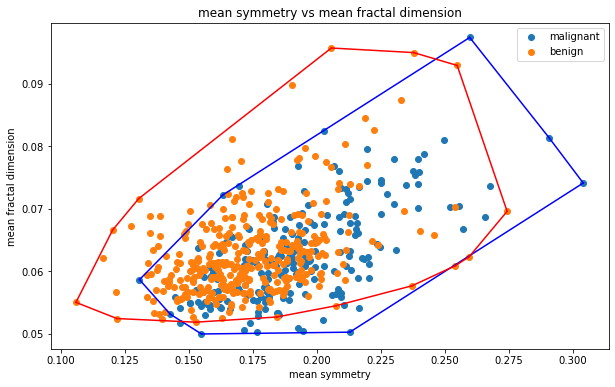

In [15]:
data = datasets.load_breast_cancer()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
#visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r']
plt.title(str(data.feature_names[8] + ' vs ' + data.feature_names[9]))
plt.xlabel(data.feature_names[8])
plt.ylabel(data.feature_names[9])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[8,9]].values
    hull = convexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        x_values = [simplex[0][0], simplex[1][0]]
        y_values = [simplex[0][1], simplex[1][1]]
        plt.plot(x_values, y_values, colors[i])
plt.legend()

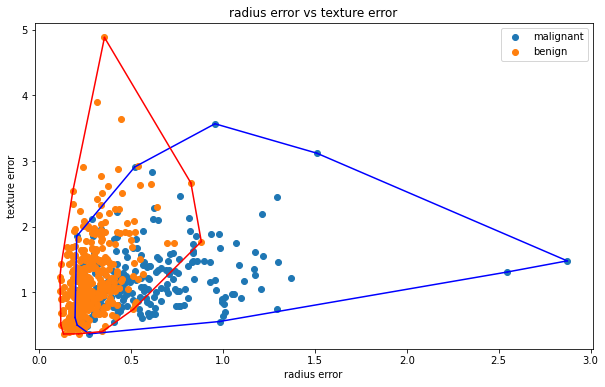

In [16]:
data = datasets.load_breast_cancer()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
#visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r']
plt.title(str(data.feature_names[10] + ' vs ' + data.feature_names[11]))
plt.xlabel(data.feature_names[10])
plt.ylabel(data.feature_names[11])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[10,11]].values
    hull = convexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        x_values = [simplex[0][0], simplex[1][0]]
        y_values = [simplex[0][1], simplex[1][1]]
        plt.plot(x_values, y_values, colors[i])
plt.legend()